In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fnz = [0, 0.18, 0.27, 0.36, 0.45]

In [3]:
fnorm = 0.09

In [4]:
fnznp = np.array(fnz, dtype=np.float64)

In [5]:
fnzpm = np.hstack((fnznp, -fnznp[(fnznp != 0.0) & (fnznp != 0.5)], [-fnorm]))

In [6]:
fnzpm

array([ 0.  ,  0.18,  0.27,  0.36,  0.45, -0.18, -0.27, -0.36, -0.45,
       -0.09])

In [7]:
binomials = np.vstack((np.exp(-2j*np.pi*fnzpm), np.full_like(fnzpm, -1)))

In [8]:
binomials = np.moveaxis(binomials, 0, 1)

In [9]:
binomials

array([[ 1.        +0.j        , -1.        +0.j        ],
       [ 0.42577929-0.90482705j, -1.        +0.j        ],
       [-0.12533323-0.9921147j , -1.        +0.j        ],
       [-0.63742399-0.77051324j, -1.        +0.j        ],
       [-0.95105652-0.30901699j, -1.        +0.j        ],
       [ 0.42577929+0.90482705j, -1.        +0.j        ],
       [-0.12533323+0.9921147j , -1.        +0.j        ],
       [-0.63742399+0.77051324j, -1.        +0.j        ],
       [-0.95105652+0.30901699j, -1.        +0.j        ],
       [ 0.84432793+0.53582679j, -1.        +0.j        ]])

In [10]:
numer = binomials[0]

In [11]:
for b in binomials[1:]:
    numer = np.convolve(numer, b)

In [12]:
numer

array([ 0.84432793+0.53582679j,  0.33071898+0.84449995j,
       -0.11844814+0.92503426j, -0.63674739+0.6914943j ,
       -0.8731626 +0.264862j  , -0.91166097-0.264862j  ,
       -0.59531541-0.6914943j , -0.16710243-0.92503426j,
        0.39564907-0.84449995j,  0.73174097-0.53582679j,
        1.        +0.j        ])

In [13]:
denom_factors = np.exp(-2j*np.pi*fnzpm) - np.exp(-2j*np.pi*fnorm)

In [14]:
denom = denom_factors.prod()

In [15]:
denom

(8.543610955702608+5.806232009798867j)

In [16]:
first_ddelay = np.floor(1/fnorm - 0.5*len(fnzpm) + 1)

In [17]:
first_ddelay

7.0

In [18]:
coeffs = numer/denom

In [19]:
coeffs

array([ 0.09675914-0.00304078j,  0.07243196+0.04962108j,
        0.0408506 +0.08051001j, -0.01335586+0.09001364j,
       -0.05549953+0.06871862j, -0.08740615+0.02839998j,
       -0.08529185-0.02297273j, -0.06371381-0.06497219j,
       -0.01427376-0.08914535j,  0.02943215-0.08271873j,
        0.08006711-0.05441355j])

In [20]:
np.exp(2j*np.pi*fnorm*first_ddelay)

(-0.6845471059286886-0.7289686274214116j)

In [21]:
coeffs = coeffs*np.exp(2j*np.pi*fnorm*first_ddelay)

In [22]:
coeffs

array([-0.06845282-0.06845282j, -0.01341088-0.08676859j,
        0.03072511-0.0848917j ,  0.07475984-0.05188257j,
        0.08808576-0.00658372j,  0.08053632+0.04427522j,
        0.04163989+0.077901j  , -0.00374758+0.09092189j,
       -0.0552131 +0.07142932j, -0.08044705+0.03516976j,
       -0.09447549-0.02111777j])

In [23]:
coeffs_re = 2*np.real(coeffs)

In [24]:
coeffs_re

array([-0.13690564, -0.02682176,  0.06145022,  0.14951968,  0.17617151,
        0.16107264,  0.08327979, -0.00749516, -0.11042619, -0.1608941 ,
       -0.18895097])

In [25]:
transf = (np.exp(-2j*np.pi*np.arange(first_ddelay, first_ddelay+len(fnzpm)+1)[None, :]
                *np.arange(0, 0.5, 0.1*fnorm)[:, None])
                *coeffs_re[None, :]).sum(axis=1)

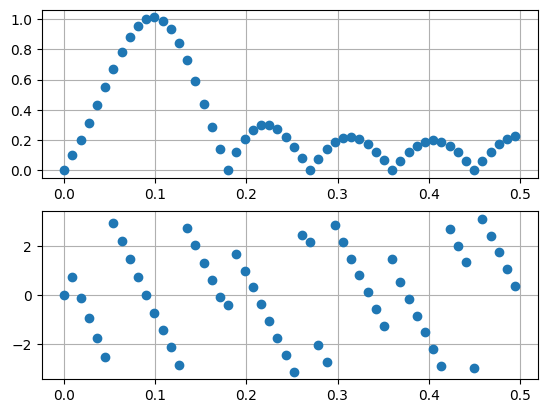

In [26]:
fig, ax = plt.subplots(2)
ax[0].plot(np.arange(0, 0.5, 0.1*fnorm), np.abs(transf), "o")
ax[1].plot(np.arange(0, 0.5, 0.1*fnorm), np.angle(transf), "o")
ax[0].grid()
ax[1].grid()

In [27]:
np.abs(transf)

array([6.93889390e-16, 9.80798118e-02, 2.00937552e-01, 3.11408204e-01,
       4.29309471e-01, 5.51423519e-01, 6.72172280e-01, 7.84563658e-01,
       8.81155110e-01, 9.54924026e-01, 1.00000000e+00, 1.01223528e+00,
       9.89596451e-01, 9.32366254e-01, 8.43152641e-01, 7.26712769e-01,
       5.89610956e-01, 4.39740588e-01, 2.85749032e-01, 1.36411142e-01,
       1.90242150e-15, 1.16296911e-01, 2.06872102e-01, 2.68066445e-01,
       2.98385133e-01, 2.98546949e-01, 2.71365633e-01, 2.21475208e-01,
       1.54923054e-01, 7.86645074e-02, 4.00296604e-16, 7.40003684e-02,
       1.37039562e-01, 1.84061630e-01, 2.11609524e-01, 2.18046450e-01,
       2.03625761e-01, 1.70406653e-01, 1.22025343e-01, 6.33428265e-02,
       1.41988150e-15, 6.20820401e-02, 1.17214742e-01, 1.60425591e-01,
       1.87872952e-01, 1.97158940e-01, 1.87515711e-01, 1.59851251e-01,
       1.16652414e-01, 6.17548005e-02, 5.88784672e-16, 6.31901134e-02,
       1.22285612e-01, 1.72127215e-01, 2.08371053e-01, 2.27862075e-01])